<a href="https://colab.research.google.com/github/jfink09/Deep-Learning/blob/main/03_pytorch_computer_vision_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch computer vision

### 0.0. Computer vision libraries in PyTorch

* `torchvision` - base domain library for PyTorch computer vision
* `torchvision.datasets` - get datasets and data-loading functions for computer vision
* `torchvision.models` - get pretrained computer vision models
* `torchvision.transforms` - functions for manipulating vision data (images) to be suitable for use with an ML model
* `torch.utils.data.Dataset` - base dataset class for PyTorch
* `torch.utils.data.DataLoader` - creates a Python iterable over a dataset

In [1]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions
print(torch.__version__)
print(torchvision.__version__)

1.12.1+cu113
0.13.1+cu113


### 1.0. Getting a dataset

The dataset we are using is FashionMNIST from `torchvision.datasets`.

In [2]:
# Set up training data
from torchvision import datasets
train_data = datasets.FashionMNIST(
    root="data", # Where to downloaddata to?
    train= True, # Do we want the training data? If false -> get testing data from FashionMNIST
    download= True, # Do we want to download yes/no?
    transform=torchvision.transforms.ToTensor(), # How do we want to transform the data?
    target_transform=None # How do we want to transform the labels/targets?
)

test_data = train_data = datasets.FashionMNIST(
    root="data",
    train= False,
    download= True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
len(train_data), len(test_data)

(10000, 10000)

In [4]:
# See the first training example
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [5]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
train_data.targets

tensor([9, 2, 1,  ..., 8, 1, 5])

In [8]:
# Check the shape of the image
print(f"Image Shape: {image.shape} -> [color channels, height, width]")
print(f"Image Label: {class_names[label]}")

Image Shape: torch.Size([1, 28, 28]) -> [color channels, height, width]
Image Label: Ankle boot


### 1.2. Visualizing the data

Image Shape: torch.Size([1, 28, 28])


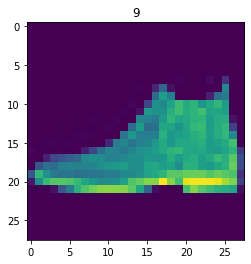

In [9]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image Shape: {image.shape}")
#image
plt.title(label);
plt.imshow(image.squeeze());

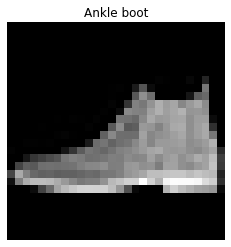

In [10]:
# Plot in gray scale
plt.imshow(image.squeeze(),cmap="gray");
plt.title(class_names[label]);
plt.axis(False);

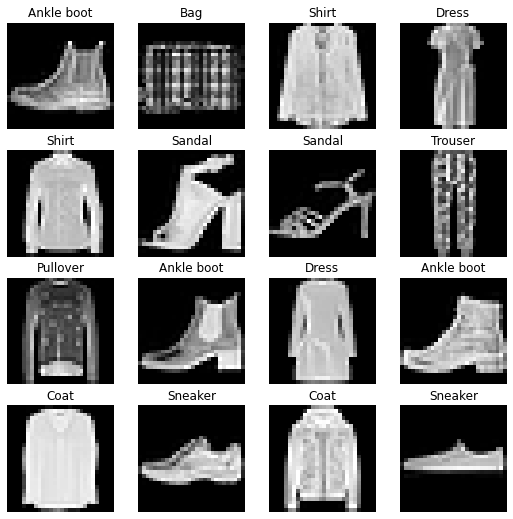

In [11]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4,4
for i in range(1,rows*cols+1):
  random_idx = torch.randint(0,len(train_data),size=[1]).item()
  #print(random_idx)
  img, label = train_data[random_idx]
  fig.add_subplot(rows,cols,i)
  plt.imshow(img.squeeze(),cmap="gray")
  plt.title(class_names[label])
  plt.axis(False);

### 2.0. Prepare DataLoader
Our data is in the form of PyTorch datasets.

DataLoader turns the dataset into a Python iterable.

Turn the data into batches (or mini-batches)

1. It is computationally efficient since instead of looking at all images together per epoch, we can set batch size to 32 to view 32 images at a time.
2. It gives the NN more chances to upgrade its gradient per epoch.

In [12]:
from torch.utils.data import DataLoader

# Set up the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                              batch_size=BATCH_SIZE,
                              shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7feb488d1c90>,
 <torch.utils.data.dataloader.DataLoader at 0x7feb488d1c50>)

In [13]:
# Check out what we created
print(f"DataLoaders: {train_dataloader,test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} Batches of {BATCH_SIZE}...")
print(f"Length of test_dataloader: {len(test_dataloader)} Batches of {BATCH_SIZE}...")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x7feb488d1c90>, <torch.utils.data.dataloader.DataLoader object at 0x7feb488d1c50>)
Length of train_dataloader: 313 Batches of 32...
Length of test_dataloader: 313 Batches of 32...


In [14]:
# See what is inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image Size: torch.Size([1, 28, 28])
Label: 5, Label Size: torch.Size([])


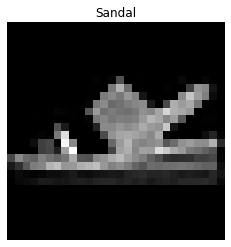

In [15]:
# Visualize
torch.manual_seed(42)
random_idx = torch.randint(0,len(train_features_batch),size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(),cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image Size: {img.shape}")
print(f"Label: {label}, Label Size: {label.shape}")

### 3.0. Model 0: Build a baseline model

When starting to build a series of ML modeling experiments, start with a baseline model.

A baseline model is a simple model you try to improve upon with subsequent models/experiements.

Start simply and add complexity when needed.

In [16]:
# Creating a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch
x.shape

# Flatten the sample
output = flatten_model(x) # Perform forward pass on flatten layer

# Print out what happened
print(f"Shape Before Flattening: {x.shape} -> [color channels, height, width]")
print(f"Shape After Flattening: {output.shape} -> [color channels, height*width]")

Shape Before Flattening: torch.Size([32, 1, 28, 28]) -> [color channels, height, width]
Shape After Flattening: torch.Size([32, 784]) -> [color channels, height*width]


In [17]:
output.squeeze()

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [18]:
from torch import nn
class FashionMNISTV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(), # Compress the image into a single vector
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape)
    )

  def forward(self,x):
    return self.layer_stack(x)

In [19]:
torch.manual_seed(42)

# Set up model with input parameters
model_0 = FashionMNISTV0(
    input_shape=784, # This is 28*28
    hidden_units=10, # How many units in the hidden layer
    output_shape=len(class_names) # One for every class (one logit value per class we have (10))
).to("cpu")

model_0

FashionMNISTV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [20]:
# Check the model
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

### 3.1. Set up loss, optimizer, and evaluation metrics

* Loss function - Since we are working with multi-class data, ou loss function will be `nn.CrossEntropyLoss()`
* Optimizer - Sticking with `torch.optim.SGD()` for stochiastic gradient descent
* Evaluation metric - Since we are working on a classification problem, use accuracy as the evaluation metric.

In [21]:
# Calculate accuracy (a classification metric)

import requests
from pathlib import Path

# Download helper functions from learnPyTorch Github repo
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download...")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100 
    return acc

In [22]:
# Import accuracy metric
#from helper_functions import accuracy_fn

# Set up loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

### 3.2. Creating a function to time our experiments

ML is very experimental.

Two main things to track:

1. Model's performance (loss, accuracy, etc.)
2. How fast it runs

In [23]:
from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device=None):
  """Prints difference between start and end time."""
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [24]:
start_time = timer()
# Some code...
end_time = timer()
print_train_time(start=start_time,end=end_time,device="cpu")

Train time on cpu: 0.000 seconds


4.019600000049195e-05

### 3.3. Creating a training loop and training a model on batches of data

1. Loop through epochs.
2. Loop through training batches, perform training steps, calculate the train loss *per batch*.
3. Loop through testing batches, perform testing steps, calculate the test loss *per batch*.
4. Print what is happening.
5. Time it all (for fun)

In [25]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs (keep it small for faster training time)
epochs = 3

# Create training and test loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n------")
  ### Training
  train_loss = 0
  # Add a loop to loop through the training batches
  for batch, (X,y) in enumerate(train_dataloader):
    model_0.train()
    # 1. Forward pass
    y_pred = model_0(X)

    # 2. Calculate the loss (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss # Accumulate train loss

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Print what is happening
    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.") # len(X) = batch size = 32
  
  # Divide total train loss by length of train dataloader
  train_loss /= len(train_dataloader)

  ### Testing
  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      # 1. Forward pass
      test_pred = model_0(X_test)
      # 2. Calculate the loss (accumulatively)
      test_loss += loss_fn(test_pred, y_test)
      # 3. Calculate the accurancy
      test_acc += accuracy_fn(y_true=y_test,y_pred=test_pred.argmax(dim=1))
    
    # Calculate the test loss average per batch (per epoch)
    test_loss /= len(test_dataloader)

    # Calculate the test accuracy average per batch (per epoch)
    test_acc /= len(test_dataloader)
  # Print what is happening
  print(f"\nTrain Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")

# Calculate the training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Looked at 0/10000 samples.

Train Loss: 0.8763 | Test Loss: 0.6139, Test Accuracy: 77.3462
Epoch: 1
------
Looked at 0/10000 samples.

Train Loss: 0.6013 | Test Loss: 0.5635, Test Accuracy: 79.6226
Epoch: 2
------
Looked at 0/10000 samples.

Train Loss: 0.5559 | Test Loss: 0.5185, Test Accuracy: 81.3199
Train time on cpu: 12.738 seconds


In [26]:
str(next(model_0.parameters()).device)

'cpu'

In [27]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      # Make predictions
      y_pred = model(X)

      # Accumulate the loss and acc values per batch
      loss += loss_fn(y_pred,y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))
      
      # Scale loss and acc to find the average loss/acc per batch
      loss /= len(data_loader)
      acc /= len(data_loader)

    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

# Calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn
)
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTV0',
 'model_loss': 0.0009357201051898301,
 'model_acc': 0.28032082083658794}

# Set up device agnostic code for using a GPU if available

In [28]:
torch.cuda.is_available()

True

In [29]:
# Set up device agnostic code
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

### 6.1. Model 1: Building a better model with non-linearity

Non-linearity is covered in notebook 02.

In [30]:
from torch.autograd.grad_mode import inference_mode
# Create a model with linear and non-linear layers
class FashionMNISTV1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(), # Flatten inputs into a single vector
        nn.Linear(in_features=input_shape,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=output_shape),
        nn.ReLU()
    )

  def forward(self,x: torch.Tensor):
    return self.layer_stack(x)


In [31]:
next(model_0.parameters()).device

device(type='cpu')

In [32]:
device

'cuda'

In [33]:
# Create an instance of model_1
torch.manual_seed(42)
model_1 = FashionMNISTV1(input_shape=784,
                         hidden_units=10,
                         output_shape=len(class_names)).to(device) # Sends to GPU if available

next(model_1.parameters()).device

device(type='cuda', index=0)

### 6.1. Set up loss, optimizer, and evaluation metrics

In [34]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss() # Measure how wrong the model is
optimizer = torch.optim.SGD(params=model_1.parameters(), # Tries to update the model's parameters to reduce the loss
                            lr=0.1)

### 6.2. Functionizing training and evaluation/testing loops

Create a function for: 

* Training loop - `train_step()`
* Testing loop `test_step()`

In [35]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    for batch, (X, y) in enumerate(data_loader):
        # Send data to GPU
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

In [36]:
def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode(): 
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)
            
            # 1. Forward pass
            test_pred = model(X)
            
            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )
        
        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [37]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader, 
        model=model_1, 
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn
    )
    test_step(data_loader=test_dataloader,
        model=model_1,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn
    )

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 1.40000 | Train accuracy: 52.21%
Test loss: 1.13051 | Test accuracy: 56.61%

Epoch: 1
---------
Train loss: 1.04924 | Train accuracy: 62.25%
Test loss: 1.03277 | Test accuracy: 62.59%

Epoch: 2
---------
Train loss: 0.99015 | Train accuracy: 64.06%
Test loss: 0.94926 | Test accuracy: 65.11%

Train time on cuda: 12.630 seconds


**Note:** Sometimes, depending on your data/hardware, your models may train faster on CPU than GPU.

Why?

1. It could be that the overhead for copying data/model to and from the GPU outweights the compute benefits offered by the GPU.
2. The hardware you are using has a better CPU in terms of compute capability than the GPU.

In [38]:
model_0_results

{'model_name': 'FashionMNISTV0',
 'model_loss': 0.0009357201051898301,
 'model_acc': 0.28032082083658794}

In [39]:
# Train time on CPU
total_train_time_model_0

12.738353821000004

In [40]:
"""
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device=device):
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      # Make our data device agnostic
      X, y = X.to(device), y.to(device)
      # Make predictions
      y_pred = model(X)

      # Accumulate the loss and acc values per batch
      loss += loss_fn(y_pred,y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))
      
      # Scale loss and acc to find the average loss/acc per batch
      loss /= len(data_loader)
      acc /= len(data_loader)

    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

# Calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn
)
model_0_results
"""

'\ntorch.manual_seed(42)\ndef eval_model(model: torch.nn.Module,\n               data_loader: torch.utils.data.DataLoader,\n               loss_fn: torch.nn.Module,\n               accuracy_fn,\n               device=device):\n  loss, acc = 0, 0\n  model.eval()\n  with torch.inference_mode():\n    for X, y in tqdm(data_loader):\n      # Make our data device agnostic\n      X, y = X.to(device), y.to(device)\n      # Make predictions\n      y_pred = model(X)\n\n      # Accumulate the loss and acc values per batch\n      loss += loss_fn(y_pred,y)\n      acc += accuracy_fn(y_true=y,\n                         y_pred=y_pred.argmax(dim=1))\n      \n      # Scale loss and acc to find the average loss/acc per batch\n      loss /= len(data_loader)\n      acc /= len(data_loader)\n\n    return {"model_name": model.__class__.__name__, # only works when model was created with a class\n            "model_loss": loss.item(),\n            "model_acc": acc}\n\n# Calculate model 0 results on test dataset

In [41]:
# Get model_1 results dictionary
"""
model_1_results = eval_model(model=model_1,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)

model_1_results
"""

'\nmodel_1_results = eval_model(model=model_1,\n                             loss_fn=loss_fn,\n                             accuracy_fn=accuracy_fn,\n                             device=device)\n\nmodel_1_results\n'

### Model 2: Building a Convolutional Neural Network (CNN)

Also known as ConvNets

CNNs find patterns in visual data

In [48]:
# Create a convolutional neural network
class FashionMNISTV2(nn.Module):

  """
  Model architecture that replicats TinyVGG
  Model from CNN explainer website
  """

  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1), # Values we can set ourselves in the NNs are hyperparameters
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*0, # Trick to calculating this
                  out_features=output_shape) # output_shape = len(class_names)
    )

  def forward(self,x):
    x = self.conv_block_1(x)
    print(x.shape)
    x = self.conv_block_2(x)
    print(x.shape)
    x = self.classifier(x)
    return x

In [49]:
image.shape

torch.Size([1, 28, 28])

In [50]:
torch.manual_seed(42)
model_2 = FashionMNISTV2(input_shape=1, # input_shape is the number of color channels. If gray scale it is 1, if colored images, it is 3
                         hidden_units=10,
                         output_shape=len(class_names)).to(device)

/usr/local/lib/python3.7/dist-packages/torch/nn/init.py:405: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")
